In [13]:
import pandas as pd

df = pd.read_csv("heart.csv") # Читаме csv через pandas
print(df.info()) #выводим инфу
print(df.isnull().sum()) #ищем нули


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


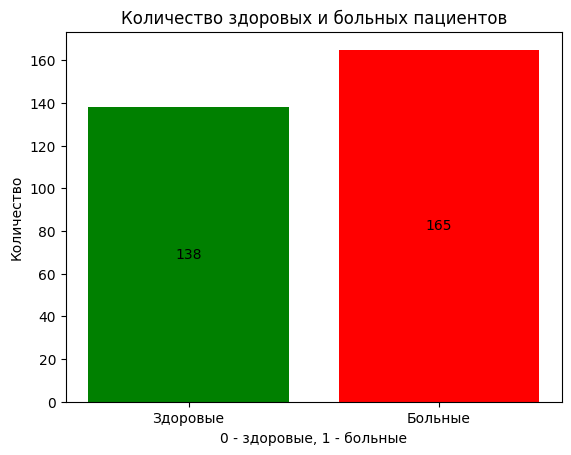

In [14]:
import matplotlib.pyplot as plt #импортируем модуль для графиков
counts = df['target'].value_counts().sort_index() #считаем кол-во уникальных значений (тут 0 и 1) + сортируем их

plt.bar(counts.index, counts.values,color=['green', 'red'])  #рисем столбчатую диаграмму

plt.title("Количество здоровых и больных пациентов") # название диаграммы
plt.xlabel("0 - здоровые, 1 - больные") # ось Х
plt.ylabel("Количество") # ось У
plt.xticks([0, 1], ['Здоровые', 'Больные']) #подпись столбцов

for i, v in enumerate(counts.values):
    plt.text(i, v/2, str(v), ha='center', va='center') # значения столбцов по центру


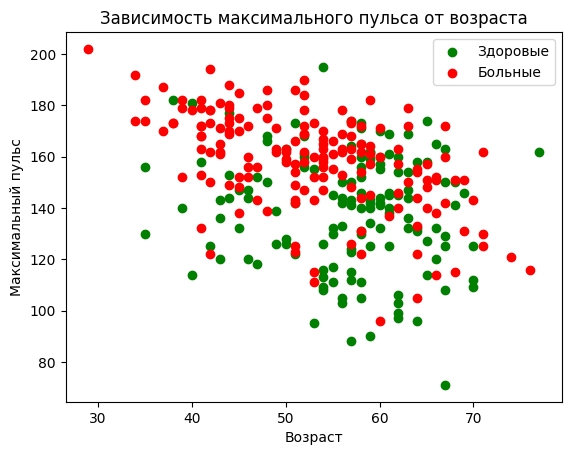

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df[df['target']==0]['age'], df[df['target']==0]['thalach'], color='green', label='Здоровые') #диаграмаа рассеиваниия для здоровыз
plt.scatter(df[df['target']==1]['age'], df[df['target']==1]['thalach'], color='red', label='Больные') # для больных

plt.title("Зависимость максимального пульса от возраста")
plt.xlabel("Возраст")
plt.ylabel("Максимальный пульс")
plt.legend() #легеннда диаграммы
plt.show() #команда для показа диаграммы


In [16]:
df['sex'] = df['sex'].map({0: 'female', 1: 'male'}) #заменяем 1 и 0 на male и female

print(df['sex']) #проверяем, что заменилось

print(pd.get_dummies(df, columns=['sex'], dtype="int")) #one hot coding


0        male
1        male
2      female
3        male
4      female
        ...  
298    female
299      male
300      male
301      male
302    female
Name: sex, Length: 303, dtype: object
     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     63   3       145   233    1        0      150      0      2.3      0   
1     37   2       130   250    0        1      187      0      3.5      0   
2     41   1       130   204    0        0      172      0      1.4      2   
3     56   1       120   236    0        1      178      0      0.8      2   
4     57   0       120   354    0        1      163      1      0.6      2   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
298   57   0       140   241    0        1      123      1      0.2      1   
299   45   3       110   264    0        1      132      0      1.2      1   
300   68   0       144   193    1        1      141      0      3.4      1   
301   57   0       130   131

In [17]:
avg_chol_1 = df[df['target'] == 1]['chol'].mean() # среднее для уровня холестерина и больных
avg_chol_0 = df[df['target'] == 0]['chol'].mean() # то же самое для здоровых
print("Средний уровень холестерина здоровых =", avg_chol_0)
print("Средний уровень холестерина больных =", avg_chol_1)

Средний уровень холестерина здоровых = 251.08695652173913
Средний уровень холестерина больных = 242.23030303030302


In [18]:
print(df[["age", "trestbps", "chol", "thalach"]].describe()) #функция describe для нужных столбцов


features = ["age", "trestbps", "chol", "thalach"] 
for column in features:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) #применяем минимакс нормализацию

print("После минимакс нормализации:")
print(df[["age", "trestbps", "chol", "thalach"]].describe()) #проверяем итог



              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865
std      9.082101   17.538143   51.830751   22.905161
min     29.000000   94.000000  126.000000   71.000000
25%     47.500000  120.000000  211.000000  133.500000
50%     55.000000  130.000000  240.000000  153.000000
75%     61.000000  140.000000  274.500000  166.000000
max     77.000000  200.000000  564.000000  202.000000
После минимакс нормализации:
              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean     0.528465    0.354941    0.274575    0.600358
std      0.189210    0.165454    0.118335    0.174849
min      0.000000    0.000000    0.000000    0.000000
25%      0.385417    0.245283    0.194064    0.477099
50%      0.541667    0.339623    0.260274    0.625954
75%      0.666667    0.433962    0.339041    0.725191
max      1.000000    1.000000    1.000000    1.000000